In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv(
    "data/twitter_training.csv",
    header=None,
    names=["tweet_id", "entity", "sentiment", "tweet"]
)

df.head()


,tweet_id,entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df.info()
df["sentiment"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [4]:
df = df.dropna(subset=["tweet"])
df.isnull().sum()


tweet_id     0
entity       0
sentiment    0
tweet        0
dtype: int64

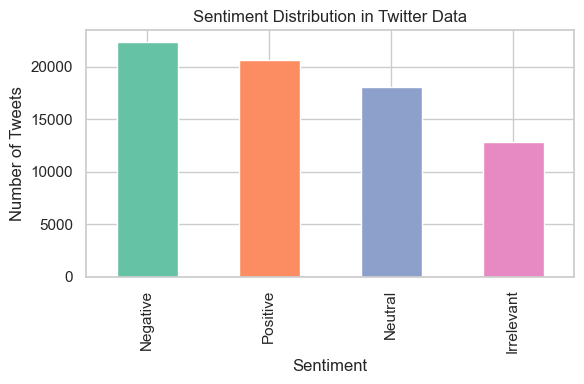

In [5]:
plt.figure(figsize=(6,4))

df["sentiment"].value_counts().plot(
    kind="bar",
    color=["#66C2A5", "#FC8D62", "#8DA0CB", "#E78AC3"]
)

plt.title("Sentiment Distribution in Twitter Data")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")

plt.tight_layout()
plt.savefig("visualization/sentiment_distribution.png", dpi=300)
plt.show()


In [6]:
top_entities = df["entity"].value_counts().head(5).index
df_top = df[df["entity"].isin(top_entities)]

df_top["entity"].value_counts()


entity
LeagueOfLegends         2377
MaddenNFL               2377
CallOfDuty              2376
Verizon                 2365
TomClancysRainbowSix    2364
Name: count, dtype: int64

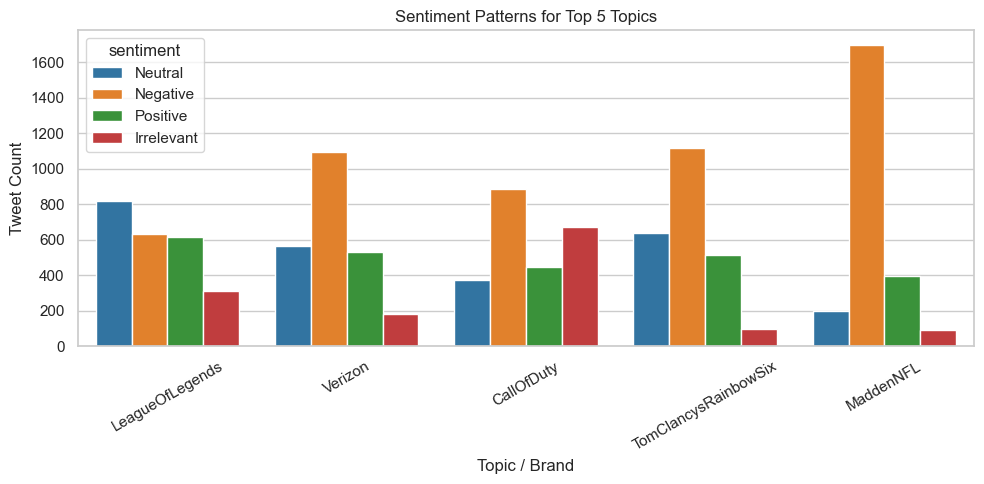

In [7]:
plt.figure(figsize=(10,5))

sns.countplot(
    data=df_top,
    x="entity",
    hue="sentiment",
    palette="tab10"
)

plt.title("Sentiment Patterns for Top 5 Topics")
plt.xlabel("Topic / Brand")
plt.ylabel("Tweet Count")

plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("visualization/top5_entity_sentiment.png", dpi=300)
plt.show()
